# File Datesets

Explore the use of the Azure ML File Dataset to mount the dataset to compute instance.

In [24]:
import os
from glob import glob
import random
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


from azureml.core import Workspace
from azureml.core import Datastore, Dataset 

In [14]:
mount_point = '/mnt/tmp/cats_dogs'

retrieve the dataset from the Azure ML service by name using: 

```python
    Dataset.get_by_name(workspace, <datasetname>)
```

In [47]:
ws = Workspace.from_config()
ds = Dataset.get_by_name(ws, 'cats_dogs')
print(type(ds))

<class 'azureml.data.file_dataset.FileDataset'>


In [10]:
!ls /mnt/tmp -l

total 0
d--------- 0 root root 0 Apr 23 05:56 cats_dogs


File datasets can be mounted to compute instances using the `mount` method, which takes a `mount_point` parameter. Then the mount can be started using the `start` method. 


In [ ]:
ds_mount = ds.mount(mount_point)
ds_mount.start()

In [46]:
print(ds_mount.mount_point)
print(os.listdir(ds_mount.mount_point))

/mnt/tmp/cats_dogs
['train', 'validation', 'vectorize.py']


In [13]:
!ls /mnt/tmp/cats_dogs -l

total 0
d--------- 0 root root   0 Apr 23 05:56 train
d--------- 0 root root   0 Apr 23 05:56 validation
-rwxrwxrwx 0 root root 140 Apr 23 04:50 vectorize.py


Retrieve list of files from mount_point, and plot them as images: 

In [40]:
cats = glob(mount_point + '/train/*/cat.*.jpg')
dogs = glob(mount_point + '/train/*/dog.*.jpg')


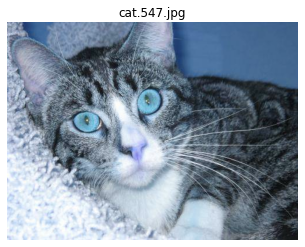

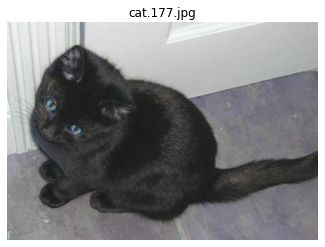

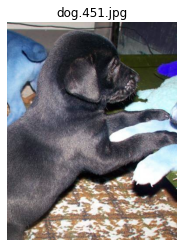

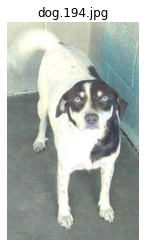

In [45]:
cats_and_dogs = random.sample(cats, 2) + random.sample(dogs, 2)
for fn in cats_and_dogs: 
    img = cv2.imread(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fn.split('/')[-1])
    plt.show()